In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("semevaltrain.csv")

In [2]:
df.head()

sentiment                                               Text  \
0          1    One Night like In Vegas I make dat Nigga Famous   
1          1  Walking through Chelsea at this time of day is...   
2          0            And on the very first play of the night   
3          0                               Drove the bike today   
4         -1  looking at the temp outside....hpw did it get ...   

                                   Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0                                         NaN        NaN        NaN   
1                                         NaN        NaN        NaN   
2   who returns it for a pick-six touchdown."        NaN        NaN   
3                                         NaN        NaN        NaN   
4                                         NaN        NaN        NaN   

  Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN

In [3]:
df.columns

Index(['sentiment', 'Text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [4]:
tweet_df = df[['sentiment','Text']]
print(tweet_df.shape)
tweet_df.head(5)

(6000, 2)


sentiment                                               Text
0          1    One Night like In Vegas I make dat Nigga Famous
1          1  Walking through Chelsea at this time of day is...
2          0            And on the very first play of the night
3          0                               Drove the bike today
4         -1  looking at the temp outside....hpw did it get ...

In [ ]:
#tweet_df = tweet_df[tweet_df['sentiment'] != 'neutral']
#print(tweet_df.shape)
#tweet_df.head(5)

(11541, 2)


text airline_sentiment
1  @VirginAmerica plus you've added commercials t...          positive
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative
5  @VirginAmerica seriously would pay $30 a fligh...          negative
6  @VirginAmerica yes, nearly every time I fly VX...          positive

In [6]:
tweet_df["sentiment"].value_counts()

 0    2712
 1    2486
-1     802
Name: sentiment, dtype: int64

In [7]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 0, 1, ..., 0, 1, 1]), Int64Index([1, 0, -1], dtype='int64'))

In [8]:
tweet = tweet_df.Text.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [9]:
print(tokenizer.word_index)

{'the': 1, 'to': 2, 'in': 3, 'on': 4, 'i': 5, 'of': 6, 'a': 7, 'for': 8, 'at': 9, 'and': 10, 'is': 11, 'http': 12, 't': 13, 'co': 14, 'with': 15, 'you': 16, 'tomorrow': 17, 'be': 18, 'it': 19, 'day': 20, 'night': 21, 'this': 22, 'my': 23, 'tonight': 24, 'rt': 25, 'that': 26, 'may': 27, 'just': 28, 'have': 29, 'going': 30, 'today': 31, 'will': 32, 'out': 33, 'see': 34, 'was': 35, 'all': 36, 'from': 37, 'are': 38, 'me': 39, 'so': 40, '1st': 41, 'saturday': 42, 'sunday': 43, 'we': 44, 'up': 45, 'if': 46, "i'm": 47, 'time': 48, 'friday': 49, 'get': 50, 'game': 51, 'good': 52, 'like': 53, 'go': 54, 'last': 55, 'new': 56, 'as': 57, 'but': 58, 'he': 59, 'one': 60, '2': 61, 'about': 62, "it's": 63, 'come': 64, 'now': 65, 'not': 66, 'show': 67, 'by': 68, 'monday': 69, 'what': 70, 'your': 71, 'got': 72, 'watch': 73, '2nd': 74, 'thursday': 75, '3': 76, 'off': 77, 'morning': 78, 'love': 79, 'back': 80, 'his': 81, 'do': 82, 'know': 83, 'us': 84, 'has': 85, 'u002c': 86, 'great': 87, 'watching': 88, 

In [10]:
print(tweet[0])
print(encoded_docs[0])

One Night like In Vegas I make dat Nigga Famous
[60, 21, 53, 3, 472, 5, 99, 2789, 968, 2347]


In [11]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0   60   21   53    3  472    5
   99 

In [12]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           464096    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 480,747
Trainable params: 480,747
Non-trainable params: 0
__________________________________________________

In [13]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
150/150 [==============================] - 39s 238ms/step - loss: 0.6141 - accuracy: 0.4406 - precision: 0.5724 - recall: 0.9927 - val_loss: 0.5143 - val_accuracy: 0.4942 - val_precision: 0.6375 - val_recall: 1.0000
Epoch 2/5
150/150 [==============================] - 38s 256ms/step - loss: 0.5038 - accuracy: 0.5081 - precision: 0.6178 - recall: 0.9407 - val_loss: 0.5473 - val_accuracy: 0.5392 - val_precision: 0.7074 - val_recall: 0.7869
Epoch 3/5
150/150 [==============================] - 35s 231ms/step - loss: 0.2096 - accuracy: 0.6121 - precision: 0.7254 - recall: 0.8418 - val_loss: 0.4733 - val_accuracy: 0.5617 - val_precision: 0.7034 - val_recall: 0.9085
Epoch 4/5
150/150 [==============================] - 36s 241ms/step - loss: 0.8387 - accuracy: 0.5194 - precision: 0.6270 - recall: 0.9454 - val_loss: 0.3595 - val_accuracy: 0.5800 - val_precision: 0.7072 - val_recall: 0.9503
Epoch 5/5
150/150 [==============================] - 34s 229ms/step - loss: 0.1039 - accuracy: 0

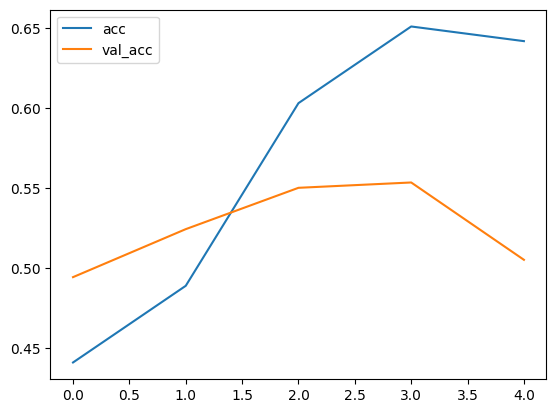

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

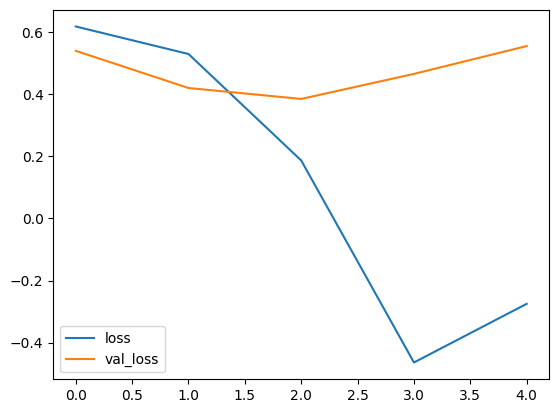

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [ ]:
def predict_sentiment(array):
    tw = tokenizer.texts_to_sequences([array])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    #print("Predicted label: ", sentiment_label[1][prediction])
    pred = sentiment_label[1][prediction]
    return pred

1/1 [==============================] - 0s 61ms/step
73
0
153
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


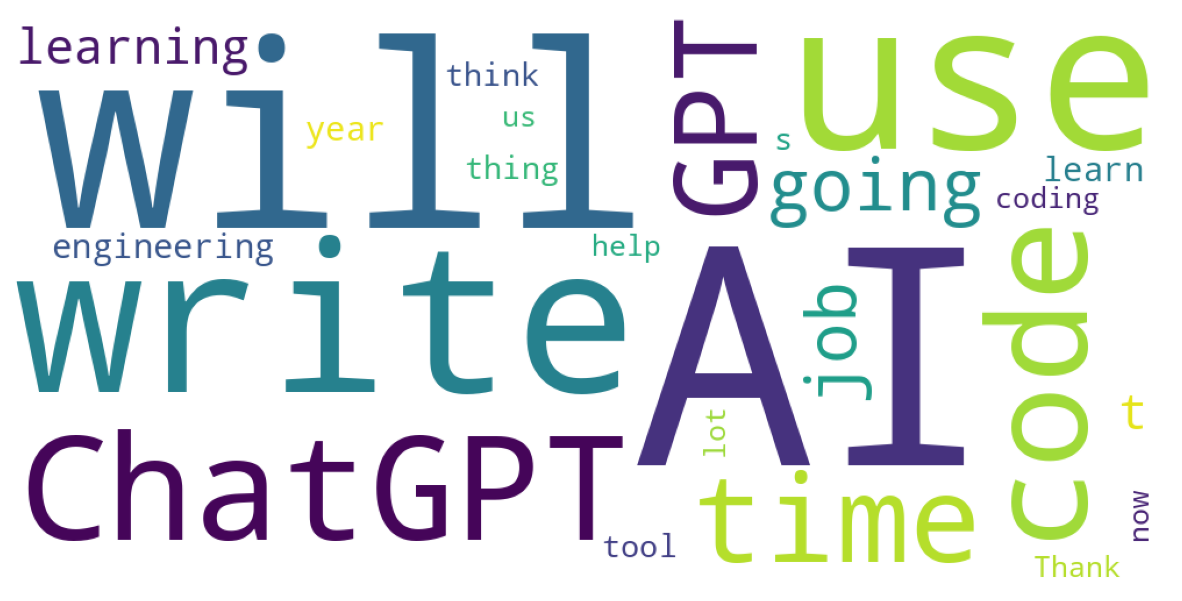

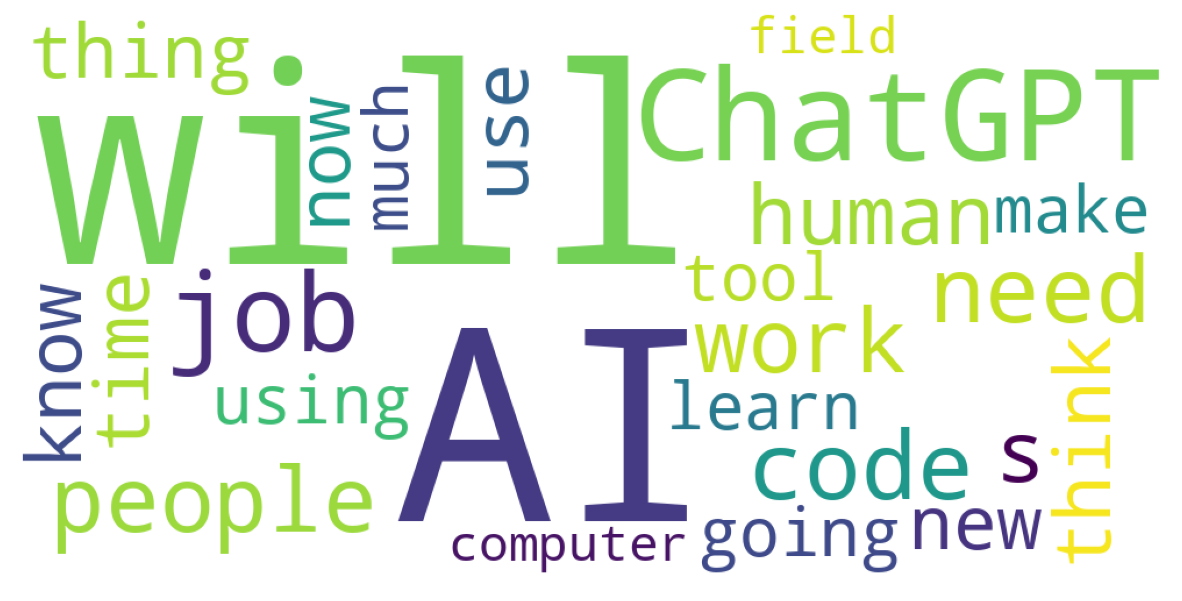

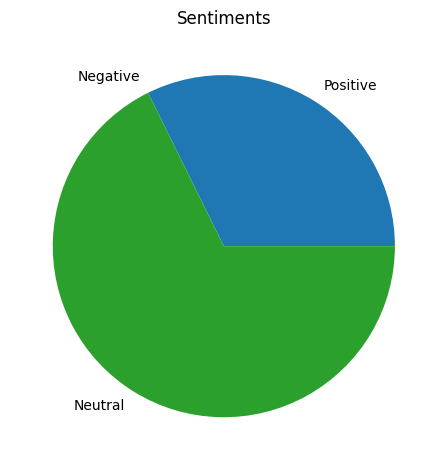

In [ ]:
from os import pwrite
#test_sentence1 = "I enjoyed my journey on this flight."
#predict_sentiment(test_sentence1)

#test_sentence2 = "This is the worst thing!"
#predict_sentiment(test_sentence2)

dft = pd.read_csv("testingsample.csv")
text2 = dft["Text"]
pos = 0
neg = 0
neu = 0

import csv 
pw = []
nw = []
nuw = []
for row in text2:
  #print(row)
  predval = predict_sentiment(row)
  if predval == 1:
    pos = pos + 1 
    pw.append(row)  
  elif predval == -1: 
    neg = neg + 1
    nw.append(row)
  elif predval == 0:
    neu = neu + 1
    nuw.append(row)

print(pos)
print(neg)
print(neu)

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

stopwords = STOPWORDS.copy()

#convert list to string and generate
unique_string=(" ").join(pw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

"""unique_=(" ").join(nw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique_)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_namei"+".png", bbox_inches='tight')
plt.show()
plt.close()"""

unique=(" ").join(nuw)
wordcloud = WordCloud(background_color='white', max_words = 25, stopwords=stopwords, margin=10, width = 1000, height = 500).generate(unique)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_namei"+".png", bbox_inches='tight')
plt.show()
plt.close()

import numpy as np
#y = np.array([pos, neg])
#mylabels = ["Positive, Negative"]
#plt.pie(y, labels = mylabels)
#plt.show() 

x = [pos, neg, neu]
mylabels = ['Positive', 'Negative', 'Neutral']

fig, ax = plt.subplots()
ax.pie(x, labels=mylabels)
ax.set_title('Sentiments')
plt.tight_layout()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')